# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

### 2. Import Dataset

In [3]:
df_cyber = pd.read_csv("Datasets/cybertroll_dataset.csv")

### 3.  Check first 10 lines

In [4]:
df_cyber.head(10)

,content,annotation
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
5,Ill save you the trouble sister. Here comes a...,1
6,Im dead serious.Real athletes never cheat don...,1
7,...go absolutely insane.hate to be the bearer...,1
8,Lmao im watching the same thing ahaha. The g...,1
9,LOL no he said What do you call a jail cell...,1


### 4. Check Datasets type values and sum & drop duplicates

In [5]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     20001 non-null  object
 1   annotation  20001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [6]:
df_cyber.shape

(20001, 2)

In [7]:
df_cyber.isnull().sum()

content       0
annotation    0
dtype: int64

In [8]:
df_cyber.content.duplicated().sum()

5373

In [9]:
df_cyber.duplicated(subset='content').sum()

5373

In [10]:
df_cyber.duplicated(subset=['content','annotation']).sum()

5359

In [11]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     20001 non-null  object
 1   annotation  20001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [12]:
df_cyber['annotation'].value_counts()

0    12179
1     7822
Name: annotation, dtype: int64

In [ ]:
# # Shuffling
# df_cyber = df_cyber.sample(frac=1)
# df_cyber.reset_index(inplace=True)
# df_cyber.drop(["index"], axis=1, inplace=True)

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

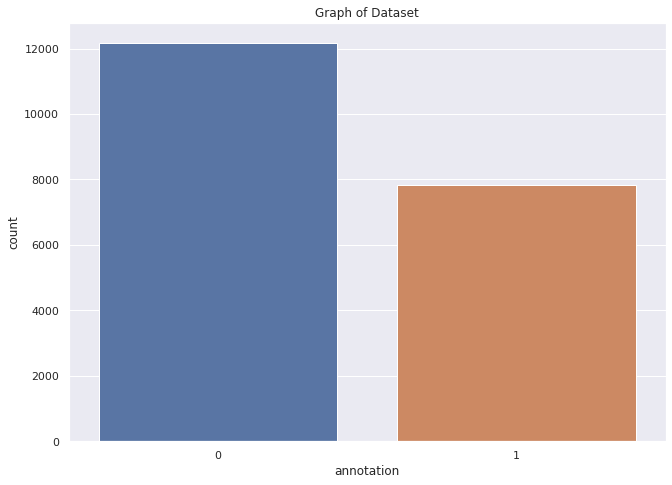

In [13]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='annotation',data=df_cyber).set(title="Graph of Dataset")

### 6.  WordCloud of Dataset

In [16]:
import re
def clean_tweets(tweet):
    # remove URL
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove usernames
    tweet = re.sub(r'@[^\s]+[\s]?','',tweet)
    # Remove hashtags
    tweet = re.sub(r'#[^\s]+[\s]?','',tweet)
    # remove special characters
    tweet = re.sub('[^ a-zA-Z0-9]' , '', tweet)
    # remove RT
    tweet = re.sub('RT' , '', tweet)
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)

    return tweet

In [17]:
df_cyber["content"] = df_cyber["content"].apply(clean_tweets)
df_cyber.head(30)

,content,annotation
0,Get fucking real dude,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up I could do it all day ...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men No men thats no...,1
5,Ill save you the trouble sister Here comes a ...,1
6,Im dead seriousReal athletes never cheat dont...,1
7,go absolutely insanehate to be the bearer of ...,1
8,Lmao im watching the same thing ahaha The ga...,1
9,LOL no he said What do you call a jail cell...,1


### 7. Stopwords

In [18]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 8. Data pre-processing

In [21]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                          for token in str(sentence).split()
                                          if token not in stopwords.words('english')))

    return preprocessed_text

In [22]:
preprocessed_review = preprocess_text(df_cyber['content'].values)
df_cyber['content']= preprocessed_review

100%|██████████| 20001/20001 [00:32<00:00, 612.41it/s] 


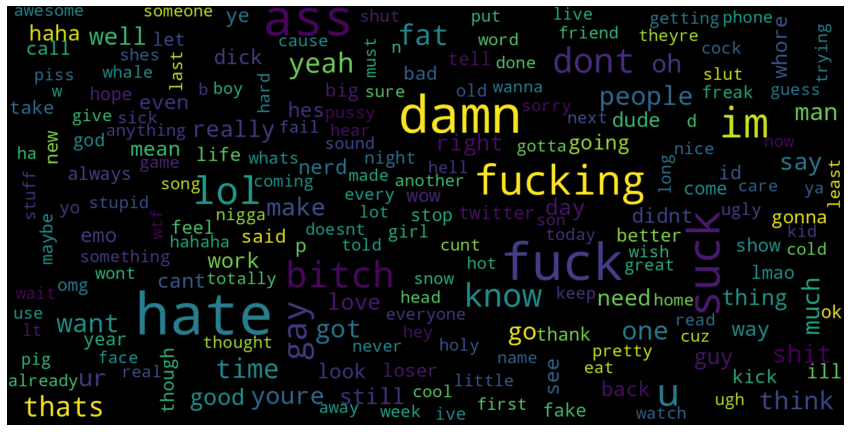

In [23]:
# Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['content'][df_cyber['annotation'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

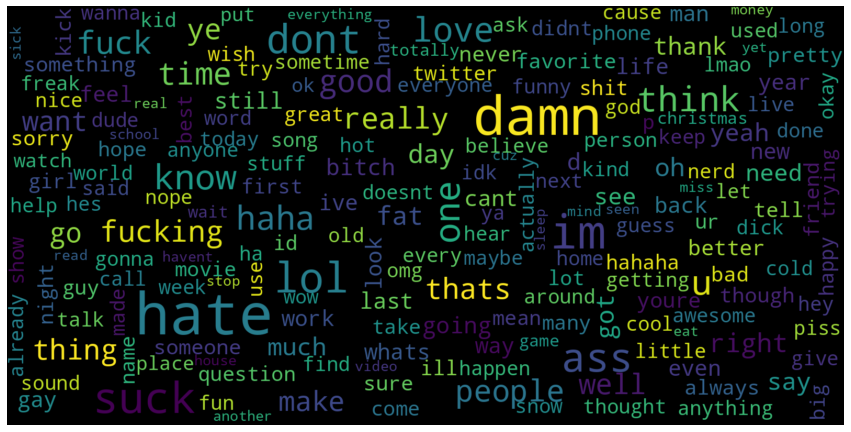

In [24]:
# Not Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['content'][df_cyber['annotation'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

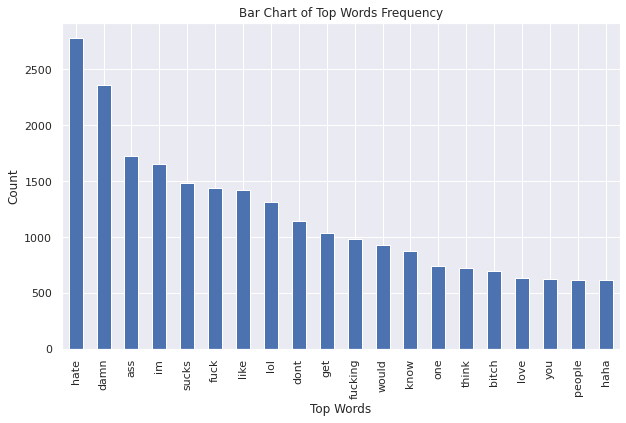

In [25]:

from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df_cyber['content'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

### 11. Train/Test Splitting

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df_cyber['content'],
                                                    df_cyber['annotation'],
                                                    test_size=0.2,
                                                    random_state=1)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [27]:
x_train.shape

(16000,)

In [28]:
x_test.shape

(4001,)

In [29]:
y_train.shape

(16000,)

In [30]:
y_test.shape

(4001,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

vectorization = CountVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [34]:
print(x_train)

  (0, 15698)	1
  (0, 7608)	1
  (0, 7006)	1
  (0, 5387)	1
  (0, 3284)	1
  (1, 3507)	1
  (1, 10406)	1
  (1, 10103)	1
  (1, 707)	1
  (2, 11592)	1
  (2, 4268)	1
  (2, 10271)	1
  (2, 971)	1
  (2, 7337)	1
  (2, 15471)	1
  (2, 5472)	1
  (2, 14882)	1
  (2, 4446)	1
  (2, 15070)	1
  (2, 14445)	1
  (3, 15698)	1
  (3, 13785)	1
  (3, 7747)	1
  (3, 8652)	1
  (3, 14996)	1
  :	:
  (15994, 5899)	1
  (15994, 1650)	1
  (15995, 3248)	1
  (15995, 13852)	1
  (15995, 11790)	1
  (15995, 9198)	1
  (15995, 11961)	1
  (15996, 6737)	1
  (15996, 15468)	1
  (15996, 1989)	1
  (15996, 14659)	1
  (15996, 4106)	1
  (15996, 14660)	1
  (15997, 707)	1
  (15997, 5472)	1
  (15997, 7747)	1
  (15997, 3248)	1
  (15997, 14657)	1
  (15997, 3339)	1
  (15998, 5241)	1
  (15998, 9234)	1
  (15998, 10427)	1
  (15998, 870)	1
  (15999, 5229)	1
  (15999, 4035)	1


In [35]:
print(x_test)

  (0, 3037)	1
  (0, 5229)	1
  (0, 8795)	1
  (1, 617)	1
  (1, 6737)	1
  (1, 8017)	1
  (1, 9072)	1
  (1, 11573)	1
  (3, 365)	1
  (3, 617)	1
  (3, 2333)	2
  (3, 3783)	1
  (3, 4426)	1
  (3, 4650)	1
  (3, 8033)	1
  (3, 8910)	1
  (3, 9734)	1
  (3, 10294)	1
  (3, 10321)	1
  (3, 11193)	1
  (3, 11812)	1
  (3, 11932)	1
  (3, 12197)	1
  (3, 13606)	1
  (3, 14810)	1
  :	:
  (3999, 2659)	1
  (3999, 2944)	1
  (3999, 3231)	1
  (3999, 4234)	1
  (3999, 4460)	1
  (3999, 6095)	1
  (3999, 6619)	1
  (3999, 6704)	1
  (3999, 9291)	1
  (3999, 10898)	1
  (3999, 11621)	1
  (3999, 11744)	1
  (3999, 12782)	1
  (4000, 75)	1
  (4000, 869)	1
  (4000, 5478)	1
  (4000, 5618)	1
  (4000, 5739)	1
  (4000, 7136)	2
  (4000, 7421)	1
  (4000, 7811)	1
  (4000, 8900)	1
  (4000, 11287)	1
  (4000, 13785)	1
  (4000, 15423)	1


### Logistic Regression (LR)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))
print(recall_score(y_test, model.predict(x_test)))
print(precision_score(y_test, model.predict(x_test)))

0.9260625
0.8157960509872532
0.8098811757348343
0.7494212962962963


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


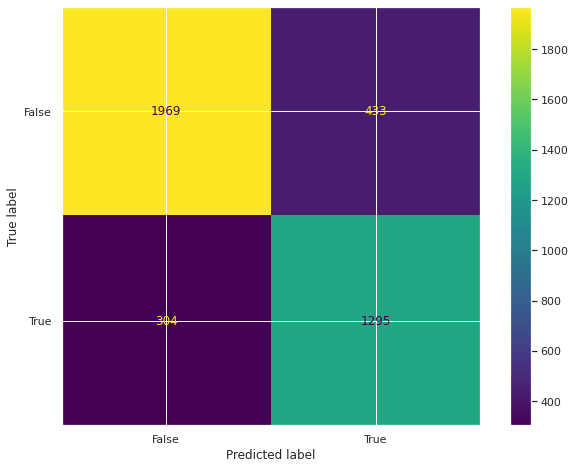

In [41]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [42]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2273
           1       0.81      0.75      0.78      1728

    accuracy                           0.82      4001
   macro avg       0.81      0.81      0.81      4001
weighted avg       0.82      0.82      0.81      4001



### Desicion Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))
print(recall_score(y_test, model.predict(x_test)))
print(precision_score(y_test, model.predict(x_test)))

0.9939375
0.8460384903774056
0.9562226391494684
0.7368674698795181


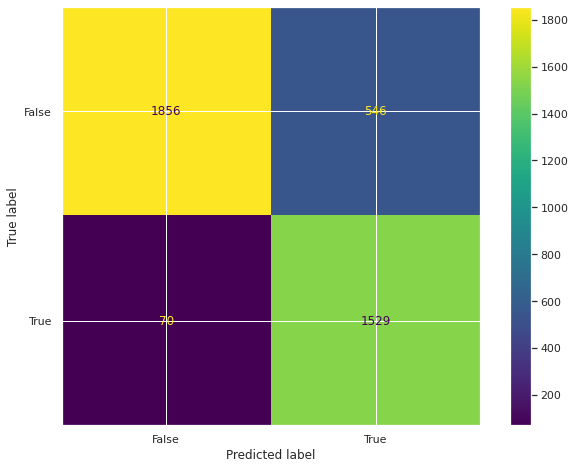

In [44]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [45]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1926
           1       0.96      0.74      0.83      2075

    accuracy                           0.85      4001
   macro avg       0.86      0.85      0.85      4001
weighted avg       0.87      0.85      0.84      4001



### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.993125
0.8647838040489878


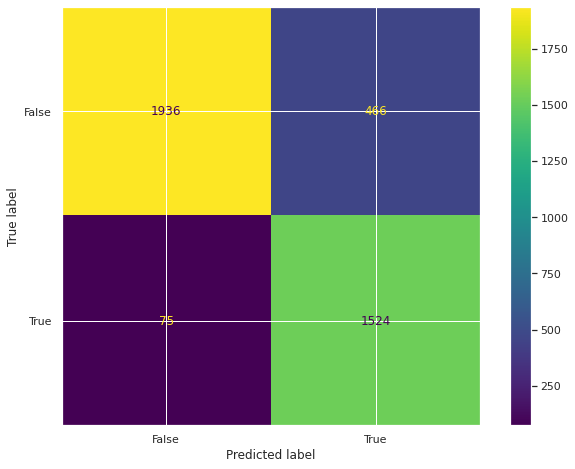

In [47]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [48]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2011
           1       0.95      0.77      0.85      1990

    accuracy                           0.86      4001
   macro avg       0.88      0.86      0.86      4001
weighted avg       0.88      0.86      0.86      4001



### XGBoost

In [49]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [50]:
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8015625
0.7348162959260185


In [51]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      2711
           1       0.57      0.71      0.63      1290

    accuracy                           0.73      4001
   macro avg       0.71      0.73      0.71      4001
weighted avg       0.76      0.73      0.74      4001



### Multinomial Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8875
0.7973006748312922


In [53]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2371
           1       0.76      0.74      0.75      1630

    accuracy                           0.80      4001
   macro avg       0.79      0.79      0.79      4001
weighted avg       0.80      0.80      0.80      4001



### Support Vector Machine

In [54]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9545
0.8372906773306673


In [55]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2127
           1       0.88      0.75      0.81      1874

    accuracy                           0.84      4001
   macro avg       0.84      0.83      0.83      4001
weighted avg       0.84      0.84      0.84      4001



### K-Nearest Neighbours

In [56]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.801875
0.7035741064733817


In [57]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.66      0.81      0.73      1960
           1       0.77      0.60      0.67      2041

    accuracy                           0.70      4001
   macro avg       0.71      0.71      0.70      4001
weighted avg       0.72      0.70      0.70      4001



### Bagging Decision Tree (Ensemble Learning I)

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.7,max_features=1.0,n_estimators=30)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.975375
0.8175456135966008


In [59]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1890
           1       0.93      0.71      0.80      2111

    accuracy                           0.82      4001
   macro avg       0.84      0.82      0.82      4001
weighted avg       0.84      0.82      0.82      4001



### Boosting Decision Tree (Ensemble Learning II)

In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model=AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=3),n_estimators=6000,learning_rate=1)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9939375
0.8935266183454137


In [70]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2156
           1       0.94      0.82      0.88      1845

    accuracy                           0.89      4001
   macro avg       0.90      0.89      0.89      4001
weighted avg       0.90      0.89      0.89      4001

